# Exmaple of Classification Using Artificial Neuronal Network (ANN) Supervised Machine Learning Algorithm

In [8]:
# Import all the necessary libraries
import numpy as np                                      # For numerical computations
import matplotlib.pyplot as plt                         # For plotting
from matplotlib.colors import ListedColormap            # For coloring the plot
from sklearn.model_selection import train_test_split    # For splitting the data into training and testing
from sklearn.datasets import make_blobs                 # For generating synthetic data
from sklearn.preprocessing import StandardScaler        # For scaling the data
from sklearn.metrics import accuracy_score              # For evaluating the clustering
import warnings                                         # For suppressing warnings
import tensorflow as tf                                 # For building the neural network

# Suppress warnings
warnings.filterwarnings("ignore")

In [9]:
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF', '#FFA500', '#FF00FF']) # Create a colormap

## prepare the data

In [10]:
n_samples = 500 # Number of samples
X, y = make_blobs(n_samples=n_samples, centers=5, random_state=32, cluster_std=0.8) # Generate isotropic Gaussian blobs for clustering
X = StandardScaler().fit_transform(X) # Standardize the features by removing the mean and scaling to unit variance

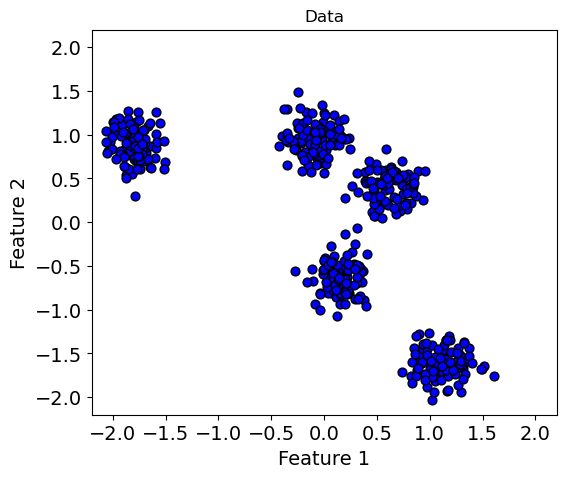

In [11]:
plt.figure(figsize=(6, 5)) # Set the size of the figure
plt.scatter(X[:, 0], X[:, 1], s=40, c='b', edgecolors='k') # Create a scatter plot of the data
plt.xlabel('Feature 1', fontsize=14) # Set the label of the x-axis
plt.ylabel('Feature 2', fontsize=14) # Set the label of the y-axis
plt.xticks(fontsize=14) # Set the font size of the x-axis ticks
plt.yticks(fontsize=14) # Set the font size of the y-axis ticks
plt.xlim(-2.2, 2.2) # Set the limits of the x-axis
plt.ylim(-2.2, 2.2) # Set the limits of the y-axis
plt.title('Data') # Set the title of the plot
plt.show() # Display the plot

## Classification Using ANN

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1) # Split the data into training and testing sets

In [13]:
# Create a meshgrid
h = 0.02 # Step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1 # Set the limits of the x-axis
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1 # Set the limits of the y-axis
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h)) # Create a meshgrid

4/4 [==============================] - 0s 4ms/step
Accuracy of ANN: 1.0
2450/2450 [==============================] - 6s 3ms/step


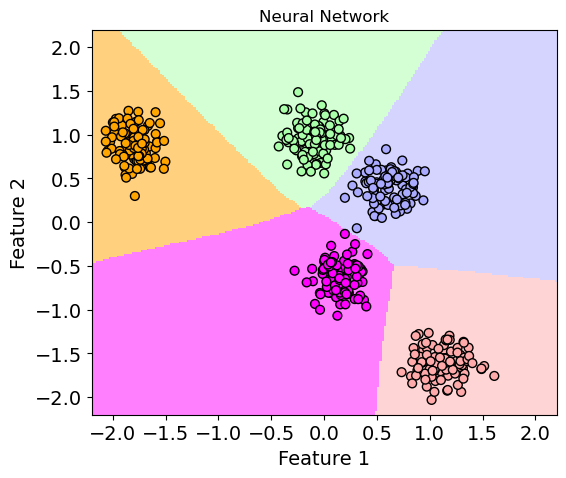

In [14]:
model = tf.keras.models.Sequential([ # Create a sequential model
    tf.keras.layers.Dense(128, input_dim=2, activation='relu'), # Add a dense layer with 2 neurons
    tf.keras.layers.Dense(64, activation='relu'), # Add a dense layer with 64 neurons
    tf.keras.layers.Dense(5, activation='softmax') # Add a dense layer with 5 neurons
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy']) # Compile the model

model.fit(X_train, y_train, epochs=100, verbose=0) # Fit the model to the data

y_pred = model.predict(X_test) # Predict the labels of the testing set
y_pred = np.argmax(y_pred, axis=1) # Convert the predicted probabilities into class labels
accuracy = accuracy_score(y_test, y_pred) # Compute the accuracy of the clustering
print('Accuracy of ANN:', accuracy) # Print the accuracy

Z = model.predict(np.c_[xx.ravel(), yy.ravel()]) # Predict the labels of the meshgrid
Z = np.argmax(Z, axis=1) # Convert the predicted probabilities into class labels
Z = Z.reshape(xx.shape) # Reshape the predicted labels

plt.figure(figsize=(6, 5)) # Set the size of the figure
plt.pcolormesh(xx, yy, Z, cmap=cmap_light, alpha=0.5) # Create a filled contour plot
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=cmap_light, edgecolors='k') # Create a scatter plot of the testing set
plt.xlabel('Feature 1', fontsize=14) # Set the label of the x-axis
plt.ylabel('Feature 2', fontsize=14) # Set the label of the y-axis
plt.xticks(fontsize=14) # Set the font size of the x-axis ticks
plt.yticks(fontsize=14) # Set the font size of the y-axis ticks
plt.xlim(-2.2, 2.2) # Set the limits of the x-axis
plt.ylim(-2.2, 2.2) # Set the limits of the y-axis
plt.title('Neural Network') # Set the title of the plot
plt.show() # Display the plot